## Notebook: Running UTOPIA Model Step by Step

### Import the necessary libraries and the UTOPIA class.

In [1]:
import os
import json
from utopia import utopiaModel  

#### Step 1: Load Configuration and Data Files

In [2]:

# Load the default configuration and data from the 'data' folder.
config_data = utopiaModel.load_json_file("data/default_config.json")
data_data = utopiaModel.load_json_file("data/default_data.json")


In [3]:

# Display the loaded config and data to ensure they were loaded correctly.
print("Loaded Configuration Data:", config_data)
print("Loaded Input Data:", data_data)


Loaded Configuration Data: {'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'boxName': 'Utopia', 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'solver': 'SteadyState', 'compartment_types': {'UTOPIA_surfaceSea_water_compartments': ['Ocean_Surface_Water', 'Coast_Surface_Water'], 'UTOPIA_water_compartments': ['Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater'], 'UTOPIA_deep_soil_compartments': ['Beaches_Deep_Soil', 'Background_Soil', 'Impacted_Soil'], 'UTOPIA_soil_surface_compartments': ['Beaches_Soil_Surface', 'Background_Soil_Surface', 'Impacted_Soil_Surface'], 'UTOPIA_sediment_compartment': ['Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast'], 'UTOPIA_air_compartments': ['Air']}}
Loaded Input Data: {'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 's


#### Step 2: Initialize the UTOPIA Model with the Loaded Data

In [4]:

# We now initialize the model by passing the loaded data into the UTOPIA class.
model = utopiaModel(config=config_data, data=data_data)


In [5]:
model.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 980
MP shape:  sphere
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  66000
Emissions to Ocean_Surface_Water for size fraction 5000.0 µm: 250000 g/s


#### Step 3: Running the Model


In [6]:
model.run()  # Run the model to estimate steady state solution for the system.

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


In [8]:
from results_processing.mass_balance_check import*
massBalance(model)

Difference inflow-outflow = -2.540473360568285e-07


'-2.540473360568285e-07'


#### Step 4: Output and Results


p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:648: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  selected_data = data_raw.applymap(sum_if_list)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:649: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log_data = selected_data.applymap(lambda x: np.log10(x) if x > 0 else np.nan)


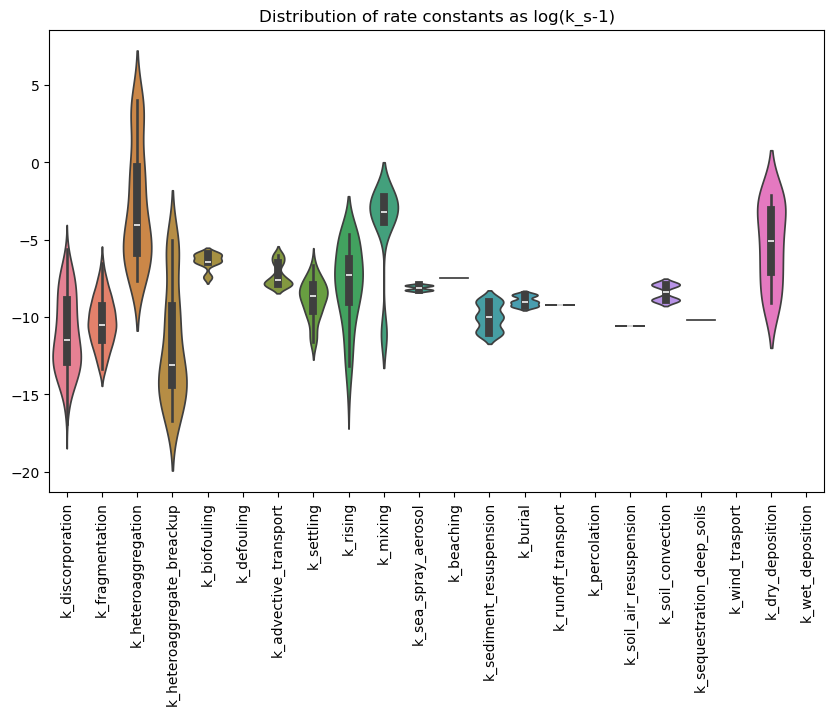

p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:507: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tables_inputFlows_mass[comp] = pd.concat(comp_input_flows_mass).fillna(0)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:508: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tables_inputFlows_number[comp] = pd.concat(comp_input_flows_num).fillna(0)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:507: FutureWarning: Downcasting object dty

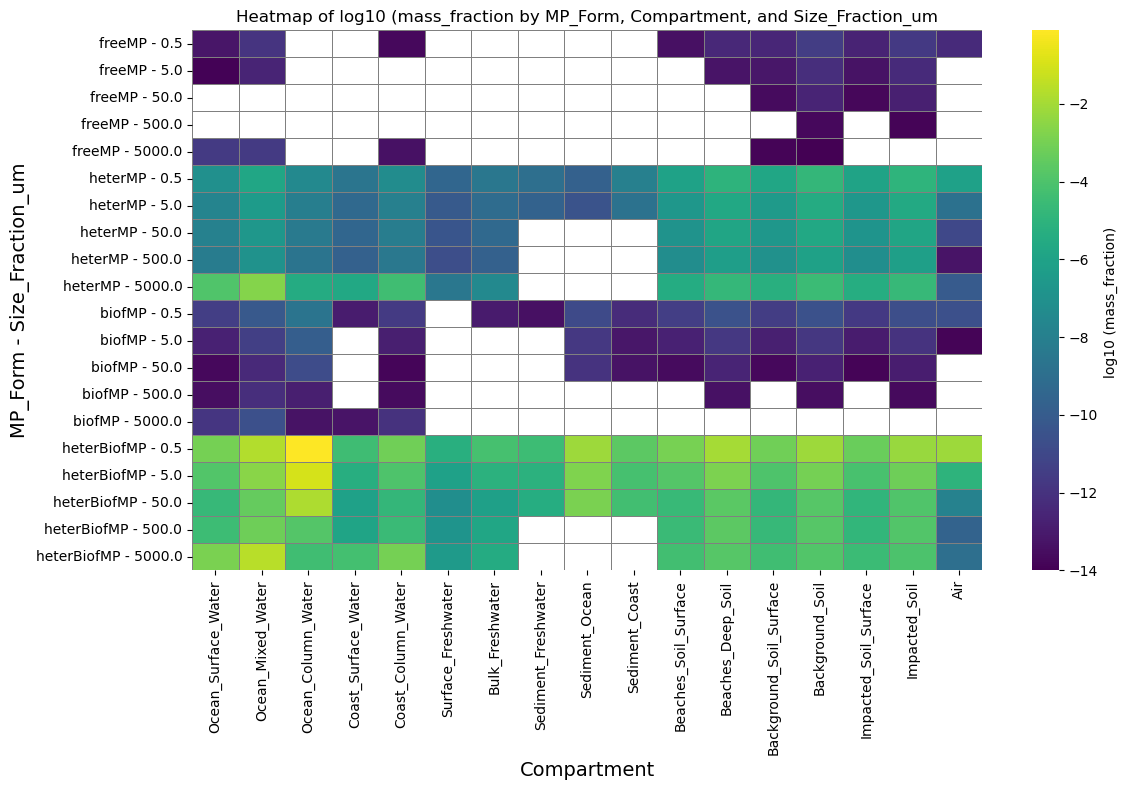

c:\Users\PradoDomercq\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_log = pivot_table_log.applymap(


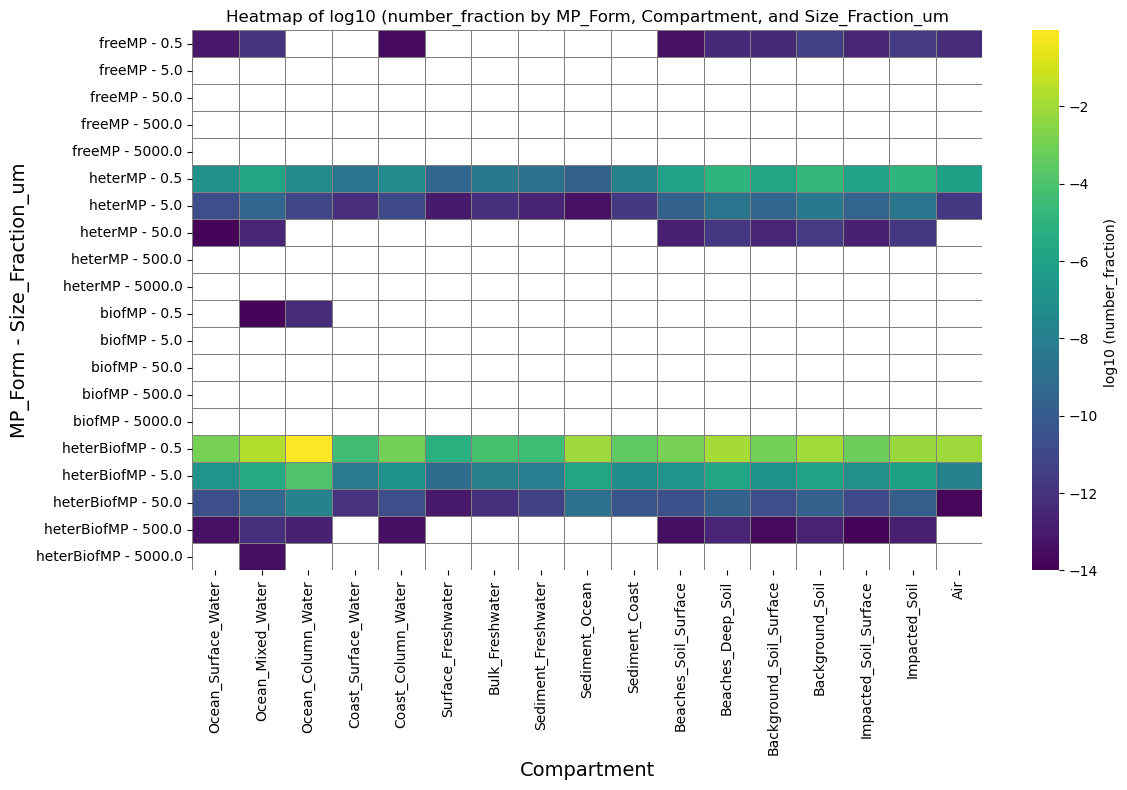

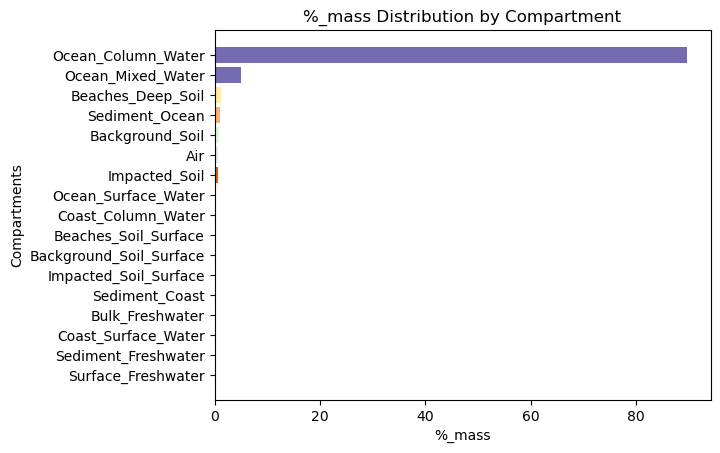

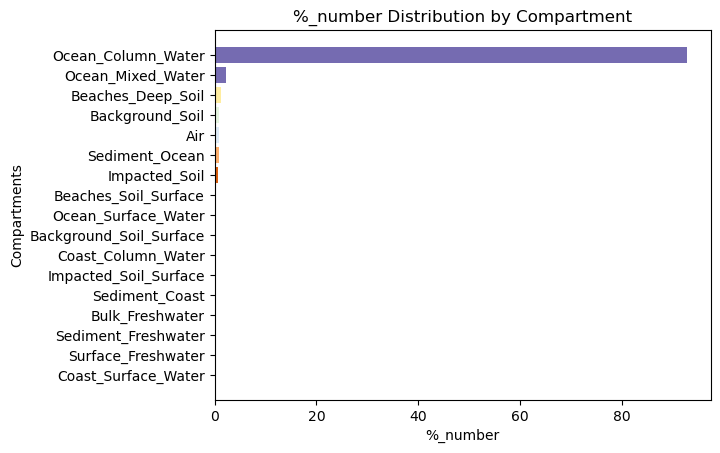

In [7]:
from results_processing.process_results import*
# Process results
processor = ResultsProcessor(model)  # Pass model with results


### Process rate constants

p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:648: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  selected_data = data_raw.applymap(sum_if_list)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:649: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log_data = selected_data.applymap(lambda x: np.log10(x) if x > 0 else np.nan)


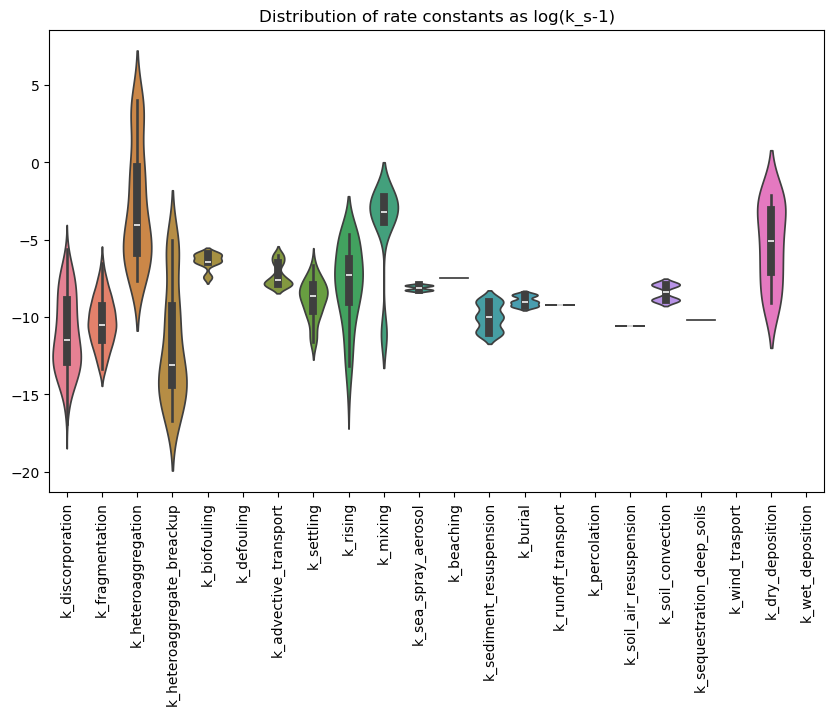

,Compartment,MP_form,Size_Bin,k_discorporation,k_fragmentation,k_heteroaggregation,k_heteroaggregate_breackup,k_biofouling,k_defouling,k_advective_transport,...,k_sediment_resuspension,k_burial,k_runoff_transport,k_percolation,k_soil_air_resuspension,k_soil_convection,k_sequestration_deep_soils,k_wind_trasport,k_dry_deposition,k_wet_deposition
0,Ocean_Surface_Water,freeMP,mp1,1.215536e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",2.246885e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ocean_Surface_Water,freeMP,mp2,1.215536e-12,"[3.1709791983764586e-10, 0.0, 0.0, 0.0, 0.0]",5.936119e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ocean_Surface_Water,freeMP,mp3,1.215536e-10,"[1.5854895991882295e-09, 1.5854895991882295e-0...",8.093206e-06,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ocean_Surface_Water,freeMP,mp4,1.215536e-08,"[1.9025875190258755e-08, 6.341958396752919e-09...",4.779367e-02,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ocean_Surface_Water,freeMP,mp5,1.215536e-06,"[2.2196854388635211e-07, 4.756468797564688e-08...",4.580818e+02,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Air,heterBiofMP,mp1,8.715346e-16,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[5.056196078431373e-10, 4.156627450980393e-11,...",0.0
336,Air,heterBiofMP,mp2,1.656240e-15,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[5.0561960784313725e-08, 4.156627450980393e-09...",0.0
337,Air,heterBiofMP,mp3,3.192150e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[5.056196078431372e-06, 4.1566274509803926e-07...",0.0
338,Air,heterBiofMP,mp4,2.502145e-12,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[0.0005056196078431373, 4.156627450980393e-05,...",0.0


In [11]:
processor.create_rateConstants_table()
processor.plot_rateConstants()
processor.RC_df


### General results

p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:507: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tables_inputFlows_mass[comp] = pd.concat(comp_input_flows_mass).fillna(0)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:508: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tables_inputFlows_number[comp] = pd.concat(comp_input_flows_num).fillna(0)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:507: FutureWarning: Downcasting object dty

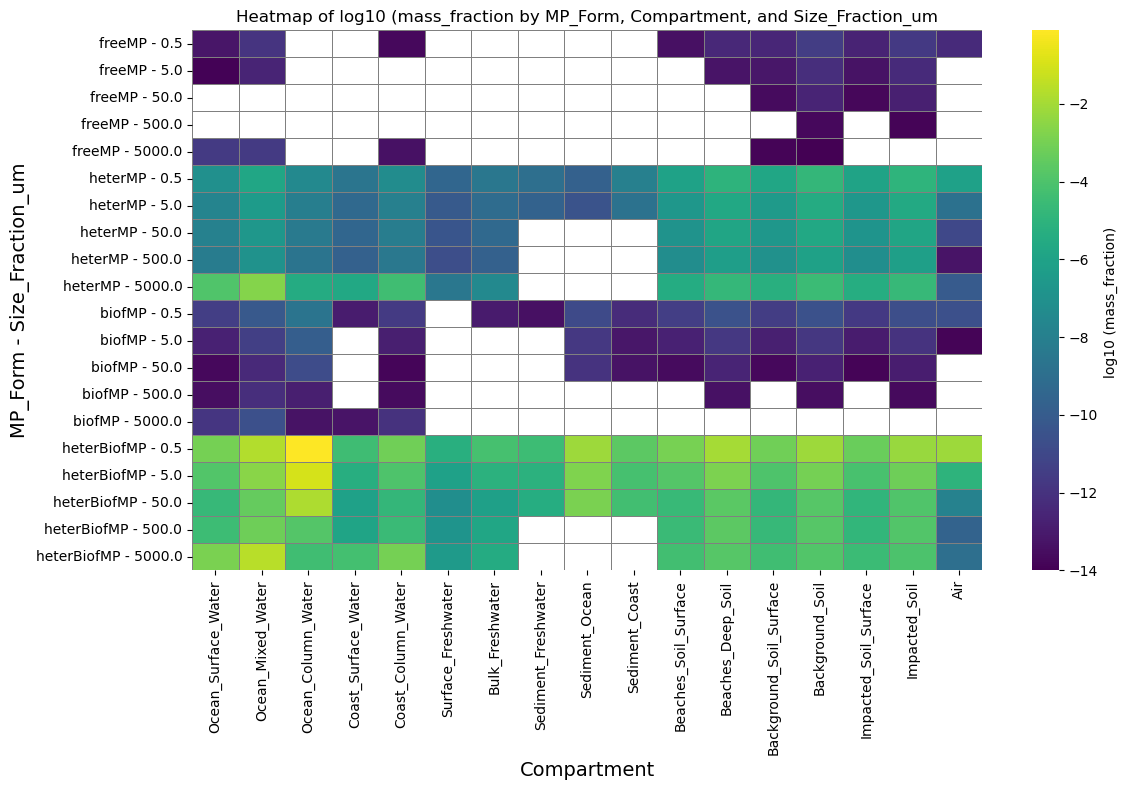

c:\Users\PradoDomercq\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_log = pivot_table_log.applymap(


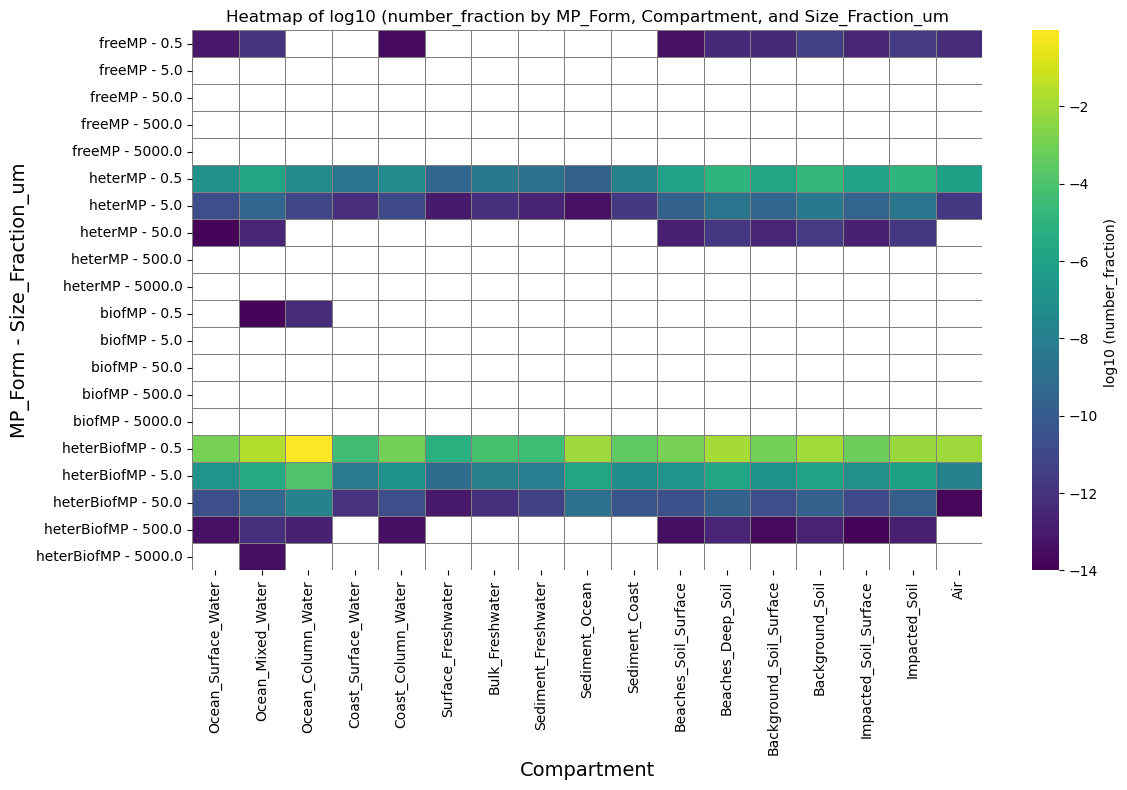

In [ ]:
processor.estimate_flows()
processor.generate_flows_dict()
processor.process_results()
for fraction in ["mass_fraction", "number_fraction"]:
    processor.plot_fractionDistribution_heatmaps(fraction)


In [16]:
processor.Results_extended

,Compartment,MP_Form,Size_Fraction_um,mass_g,number_of_particles,concentration_g_m3,concentration_num_m3,mass_fraction,number_fraction,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s,Total_inflows_g_s,Total_outflows_g_s,Total_inflows_num_s,Total_outflows_num_s
species,,,,,,,,,,,,,,,,,
aA0_Utopia,Ocean_Surface_Water,freeMP,0.5,1.460481e+01,2.276991e+14,8.960009e-15,1.396927e-01,6.050821e-14,7.193138e-14,"{'k_fragmentation': 0.00012727937390126368, 'k...","{'k_fragmentation': 14.27707538191554, 'k_hete...","{'k_discorporation': 1.7752675303857898e-13, '...","{'k_discorporation': 2.7677642720467595, 'k_fr...",0.040327,0.040327,6.267444e+11,6.287288e+11
bA0_Utopia,Ocean_Surface_Water,freeMP,5.0,2.886891e+00,4.500862e+10,1.771099e-15,2.761265e-05,1.196048e-14,1.421847e-17,"{'k_fragmentation': 2.7274107683508296e-05, 'k...","{'k_fragmentation': 0.0033753983394508654, 'k_...","{'k_discorporation': 3.509119955060573e-12, 'k...","{'k_discorporation': 0.05470959543676406, 'k_f...",0.007971,0.007971,1.238555e+08,1.242807e+08
cA0_Utopia,Ocean_Surface_Water,freeMP,50.0,1.193429e-01,1.860637e+06,7.321648e-17,1.141495e-09,4.944412e-16,5.877854e-22,"{'k_fragmentation': 1.8182615695204384e-05, 'k...","{'k_fragmentation': 0.00028363761709358635, 'k...","{'k_discorporation': 1.4506552437924109e-11, '...","{'k_discorporation': 0.00022616713740905215, '...",0.000330,0.000330,4.869183e+03,5.152664e+03
dA0_Utopia,Ocean_Surface_Water,freeMP,500.0,1.600817e-03,2.495783e+01,9.820961e-19,1.531155e-14,6.632234e-18,7.884315e-27,"{'k_fragmentation': 9.091302771445937e-06, 'k_...","{'k_fragmentation': 0.00014173966777671854, 'k...","{'k_discorporation': 1.9458500631449488e-11, '...","{'k_discorporation': 3.033714181863137e-07, 'k...",0.000081,0.000081,1.120139e+00,1.261741e+00
eA0_Utopia,Ocean_Surface_Water,freeMP,5000.0,5.734066e+02,8.939804e+03,3.517832e-13,5.484543e-12,2.375642e-12,2.824133e-24,"{'k_fragmentation': 0.0, 'k_heteroaggregate_br...","{'k_fragmentation': 0.0, 'k_heteroaggregate_br...","{'k_discorporation': 0.0006969963553122015, 'k...","{'k_discorporation': 0.010866652923915615, 'k_...",12668.729382,262668.729382,1.975142e+05,4.095186e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aD16_Utopia,Air,heterBiofMP,0.5,1.792538e+12,2.794690e+25,5.857967e-07,9.132973e+06,7.426541e-03,8.828577e-03,"{'k_sea_spray_aerosol': 1401.3530391057411, 'k...","{'k_sea_spray_aerosol': 2272678346437.7134, 'k...","{'k_discorporation': 0.0015622587292308677, 'k...","{'k_discorporation': 2533631.059680731, 'k_fra...",1417.481926,1417.481926,2.298836e+12,2.298836e+12
bD16_Utopia,Air,heterBiofMP,5.0,2.402843e+09,3.746197e+19,7.852427e-10,1.224247e+01,9.955053e-06,1.183444e-08,"{'k_sea_spray_aerosol': 187.84016769264295, 'k...","{'k_sea_spray_aerosol': 118233715073.6936, 'k_...","{'k_discorporation': 3.979683237823213e-06, 'k...","{'k_discorporation': 2504.9633409306916, 'k_fr...",190.008961,190.008961,1.195988e+11,1.195988e+11
cD16_Utopia,Air,heterBiofMP,50.0,3.634910e+06,5.667075e+13,1.187879e-12,1.851985e-05,1.505955e-08,1.790260e-14,"{'k_sea_spray_aerosol': 28.40661440941297, 'k_...","{'k_sea_spray_aerosol': 258281412.40991032, 'k...","{'k_discorporation': 1.1603178722843267e-07, '...","{'k_discorporation': 1.0549956238317209, 'k_fr...",28.743684,28.743684,2.613462e+08,2.613462e+08


### Results by compartment

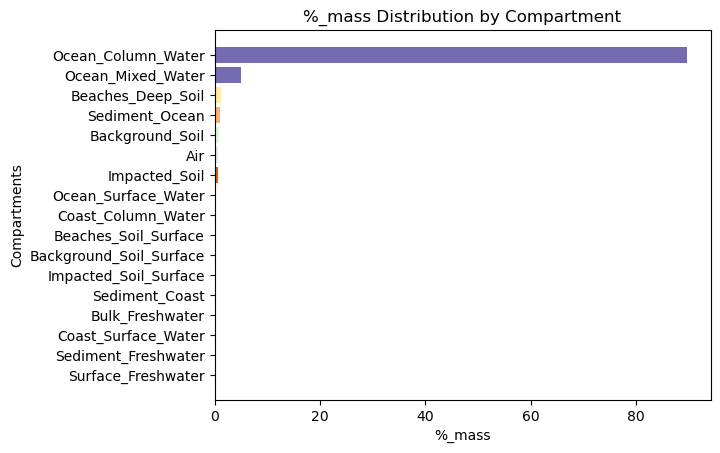

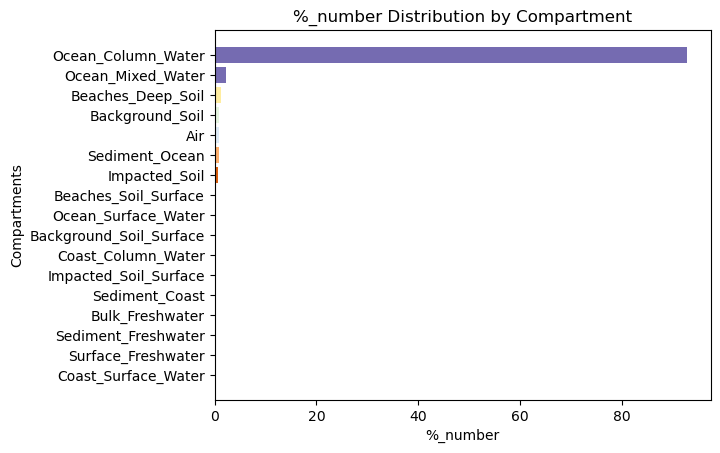

,Compartments,mass_g,number_of_particles,%_mass,%_number,Concentration_g_m3,Concentration_num_m3,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s
0,Ocean_Surface_Water,6.254609e+11,3.634274e+24,0.259130,0.114809,3.837184e-04,2.229616e+09,"{'k_rising': 41597264.21580822, 'k_mixing': 16...","{'k_rising': 740503566.49987, 'k_mixing': 1.09...","{'k_discorporation': 81634.33365275656, 'k_adv...","{'k_discorporation': 364920130.14602053, 'k_ad..."
1,Ocean_Mixed_Water,1.220660e+13,7.268557e+25,5.057231,2.296176,3.744354e-04,2.229619e+09,"{'k_settling': 1201.7791691207096, 'k_mixing':...","{'k_settling': 1496241095803.1035, 'k_mixing':...","{'k_discorporation': 156211.162067447, 'k_adve...","{'k_discorporation': 729731694.8271275, 'k_adv..."
2,Ocean_Column_Water,2.164133e+14,2.935252e+27,89.660714,92.726194,1.652010e-04,2.240650e+09,"{'k_settling': 1201.78199296025, 'k_mixing': 3...","{'k_settling': 1496243048546.2112, 'k_mixing':...","{'k_discorporation': 318.2548167463825, 'k_adv...","{'k_discorporation': 29275878215.340378, 'k_ad..."
3,Coast_Surface_Water,2.444264e+10,1.496163e+23,0.010127,0.004726,3.642718e-04,2.229752e+09,"{'k_advective_transport': 25771.098530217885, ...","{'k_advective_transport': 16406735104791.328, ...","{'k_discorporation': 3118.989723119641, 'k_adv...","{'k_discorporation': 15018544.21306333, 'k_adv..."
4,Coast_Column_Water,4.768824e+11,2.987880e+24,0.197574,0.094389,3.558824e-04,2.229761e+09,"{'k_advective_transport': 167608.256396399, 'k...","{'k_advective_transport': 109406991698222.34, ...","{'k_discorporation': 5960.213973119442, 'k_adv...","{'k_discorporation': 29988286.62828334, 'k_adv..."
5,Surface_Freshwater,1.809704e+09,2.319279e+22,0.000750,0.000733,1.999672e-04,2.562739e+09,"{'k_rising': 17431.83212303521, 'k_mixing': 12...","{'k_rising': 336219.9676195706, 'k_mixing': 1....","{'k_discorporation': 19.323385507147467, 'k_ad...","{'k_discorporation': 2303760.3282926725, 'k_ad..."
6,Bulk_Freshwater,1.807065e+10,2.319236e+23,0.007487,0.007327,1.996757e-04,2.562691e+09,"{'k_settling': 39.11527257019999, 'k_mixing': ...","{'k_settling': 51196279557.39211, 'k_mixing': ...","{'k_discorporation': 18.69185177664627, 'k_adv...","{'k_discorporation': 2303707.710225396, 'k_adv..."
7,Sediment_Freshwater,1.057140e+10,1.222844e+23,0.004380,0.003863,1.168110e-02,1.351209e+11,{'k_settling': 39.11457761853475},{'k_settling': 51195326333.143814},"{'k_discorporation': 0.00040608252407624333, '...","{'k_discorporation': 132021.78294848162, 'k_se..."
8,Sediment_Ocean,2.342931e+12,2.604147e+25,0.970684,0.822664,2.393188e-01,2.660007e+12,{'k_settling': 1195.0067372890644},{'k_settling': 1507315661091.7324},"{'k_discorporation': 0.11169173292877645, 'k_s...","{'k_discorporation': 28482022.803501077, 'k_se..."
9,Sediment_Coast,8.975878e+10,9.831822e+23,0.037187,0.031059,3.349208e-02,3.668590e+11,{'k_settling': 98.73917829027168},{'k_settling': 123005407768.27425},"{'k_discorporation': 0.004525145934214199, 'k_...","{'k_discorporation': 1081763.9479435002, 'k_se..."


In [18]:
processor.extract_results_by_compartment()
for fraction in ["%_mass", "%_number"]:
    processor.plot_compartment_distribution(fraction)
processor.results_by_comp




# Let's print the results (this part depends on how your model outputs results).
# print("Model Results:", results)

# Step 5: Visualize the Results (Optional)

# If your model has data for visualization, we can plot the results using libraries like matplotlib.
# Example:
# import matplotlib.pyplot as plt

# plt.plot(results['some_data_column'])  # Replace with actual results data
# plt.title("Model Results Over Time")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

# Step 6: Advanced Configuration (Optional)

# Allow users to adjust some configuration parameters if needed. This could be useful if you want to modify some settings during runtime.
# For example:
# user_config = {"MPdensity_kg_m3": 1200, "boxName": "New_Box"}  # Modify based on user input
# model.update_config(user_config)  # Assuming a method for updating configuration

# Step 7: Saving the Model Output (Optional)

# If you want users to save the results, add a section for that.
# Example:
# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")


# For example, assuming the model returns results as a dictionary or DataFrame:
# results = model.get_results()  # Replace with the actual result retrieval method

# Let's print the results (this part depends on how your model outputs results).
# print("Model Results:", results)

# Step 5: Visualize the Results (Optional)

# If your model has data for visualization, we can plot the results using libraries like matplotlib.
# Example:
# import matplotlib.pyplot as plt

# plt.plot(results['some_data_column'])  # Replace with actual results data
# plt.title("Model Results Over Time")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

# Step 6: Advanced Configuration (Optional)

# Allow users to adjust some configuration parameters if needed. This could be useful if you want to modify some settings during runtime.
# For example:
# user_config = {"MPdensity_kg_m3": 1200, "boxName": "New_Box"}  # Modify based on user input
# model.update_config(user_config)  # Assuming a method for updating configuration

# Step 7: Saving the Model Output (Optional)

# If you want users to save the results, add a section for that.
# Example:
# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")
